In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()
print ("Dataset : \n {}".format(iris_data.all))
print("Kurtosis result :  \n {}".format(iris_data.kurtosis()))
print("Skew result :  \n {}".format(iris_data.skew()))

Dataset : 
 <bound method DataFrame.all of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5       

In [8]:
iris_X = iris_data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
from sklearn.svm import OneClassSVM
nu = 0.05  
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu)
ocsvm.fit(iris_X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.05, kernel='rbf',
      max_iter=-1, nu=0.05, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [10]:
pred_ocsvm = ocsvm.predict(iris_X)
pred_ocsvm

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [9]:
X_outliers = iris_data[ocsvm.predict(iris_X) == -1]
X_outliers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
13,4.3,3.0,1.1,0.1,0
15,5.7,4.4,1.5,0.4,0
41,4.5,2.3,1.3,0.3,0
106,4.9,2.5,4.5,1.7,2
117,7.7,3.8,6.7,2.2,2
118,7.7,2.6,6.9,2.3,2
122,7.7,2.8,6.7,2.0,2


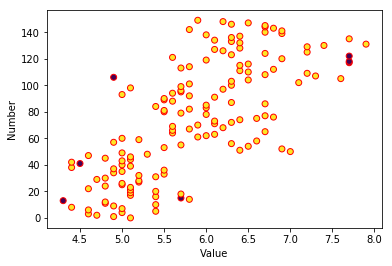

In [23]:
clus = plt.scatter(iris_data['sepal length (cm)'], np.arange(0, len(iris_data['sepal length (cm)'])), c=pred_ocsvm, edgecolors='r', facecolors='none', label="Sepal length")
#clus = plt.scatter(iris_data['sepal width (cm)'], np.arange(0, len(iris_data['sepal width (cm)'])), c=pred_ocsvm, edgecolors='g', facecolors='none', label="sepal width (cm)")
#clus = plt.scatter(iris_data['petal length (cm)'], np.arange(0, len(iris_data['petal length (cm)'])), c=pred_ocsvm, edgecolors='b', facecolors='none', label="petal length (cm)")
#clus = plt.scatter(iris_data['sepal width (cm)'], np.arange(0, len(iris_data['petal width (cm)'])), c=pred_ocsvm, edgecolors='y', facecolors='none', label="petal width (cm)")
#clus = plt.scatter(iris_data['sepal width (cm)'], np.arange(0, len(iris_data['Type'])), c=pred_ocsvm, edgecolors='none', facecolors='none', label="Type")
#clus = plt.scatter(iris_data, np.arange(0, len(iris_data['petal width (cm)'])), c=pred_ocsvm, edgecolors='y', facecolors='none', label="petal width (cm)")

plt.ylabel('Number')
plt.xlabel('Value')
plt.show(clus)